In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv('insurance.csv')

In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualization


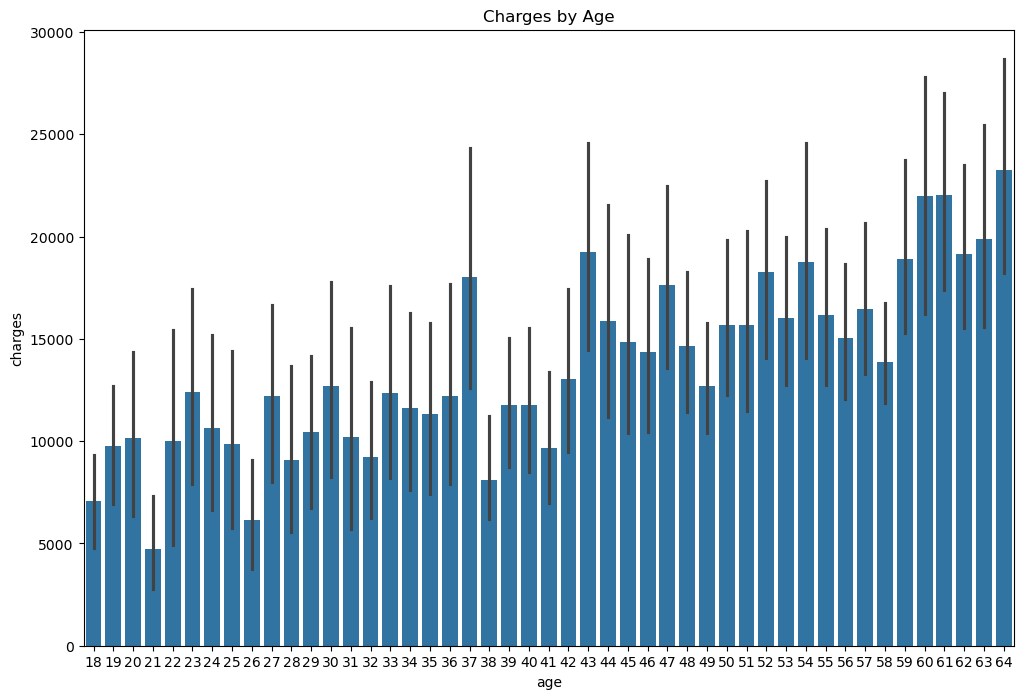

In [8]:
# Visualizing charges by age
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='charges', data=df)
plt.title('Charges by Age')
plt.show()

In [9]:
num_col = df.select_dtypes(exclude=['object']).columns
cat_col = df.select_dtypes(include=['object']).columns

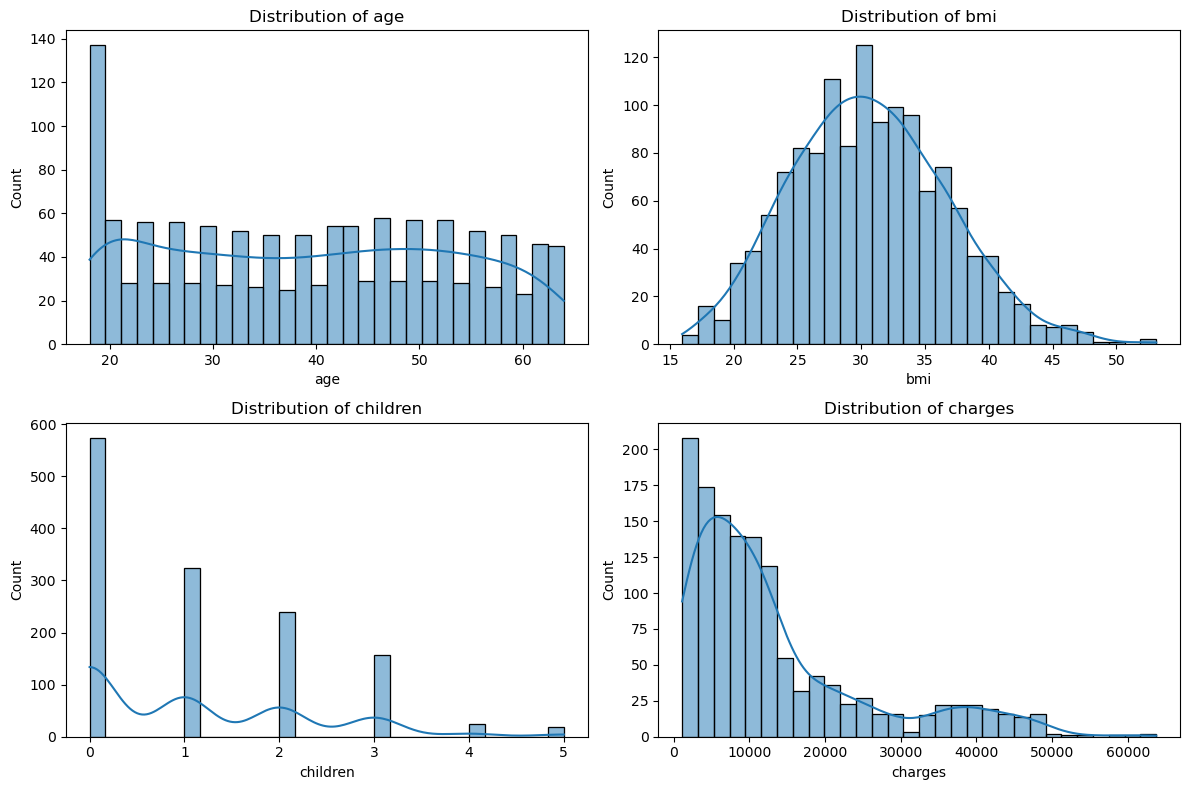

In [10]:
# Visualizing Numerical Columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

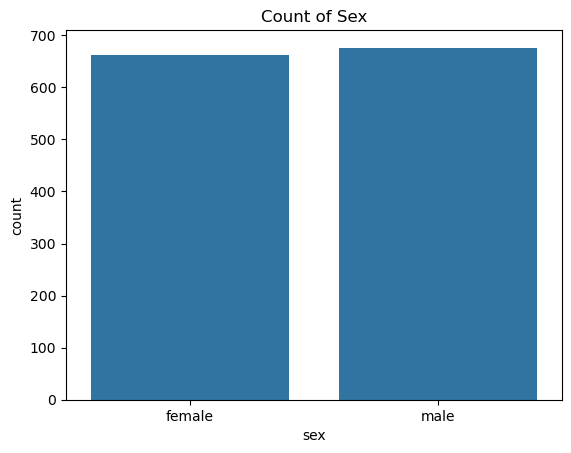

In [11]:
sns.countplot(x='sex', data=df)
plt.title('Count of Sex')
plt.show()

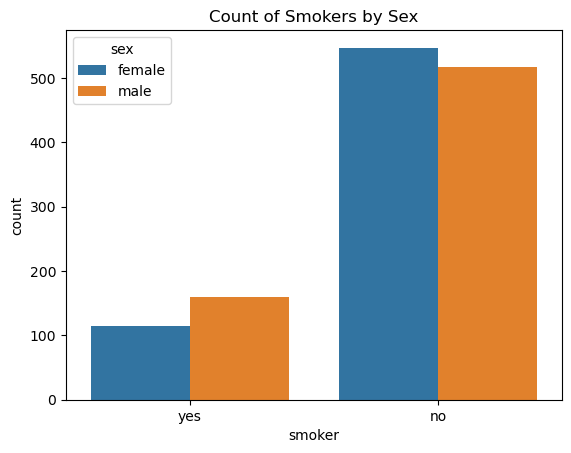

In [12]:
sns.countplot(x='smoker', data=df, hue='sex')
plt.title('Count of Smokers by Sex')
plt.show()

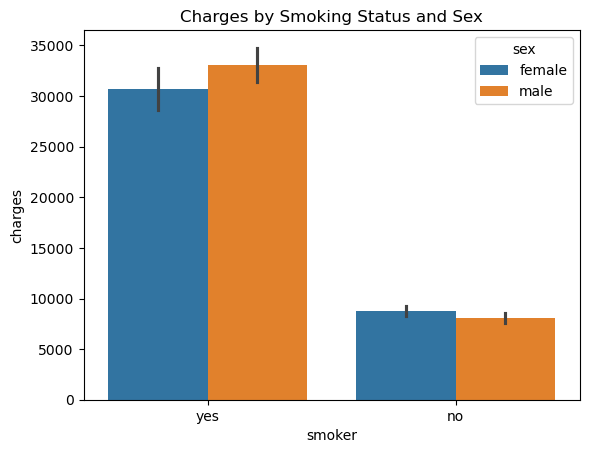

In [13]:
sns.barplot(x='smoker', y='charges', data=df, hue='sex')
plt.title('Charges by Smoking Status and Sex')
plt.show()

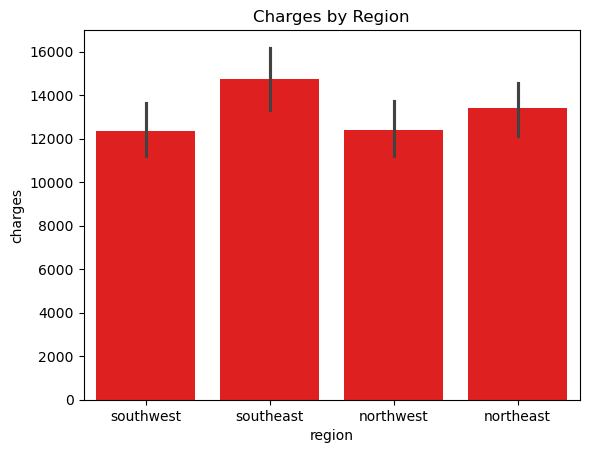

In [14]:
sns.barplot(x='region', y='charges', data=df, color='r')
plt.title('Charges by Region')
plt.show()

C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_1832\476474280.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], kde=True)


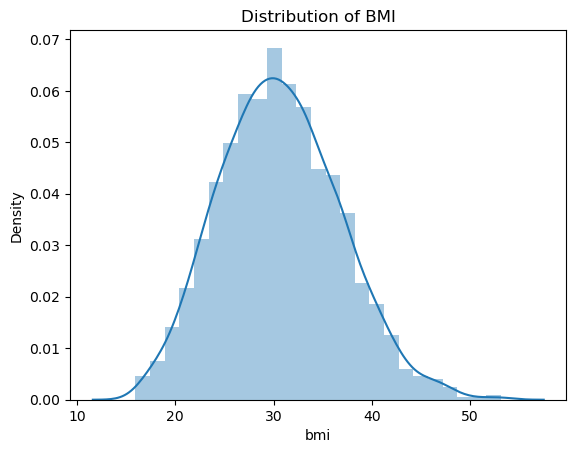

In [15]:
sns.distplot(df['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.show()

C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_1832\3800572202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], kde=True)


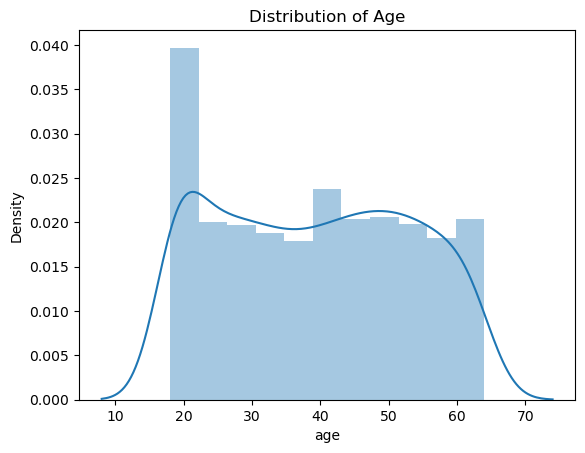

In [16]:
sns.distplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_1832\2954570614.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['children'], kde=True)


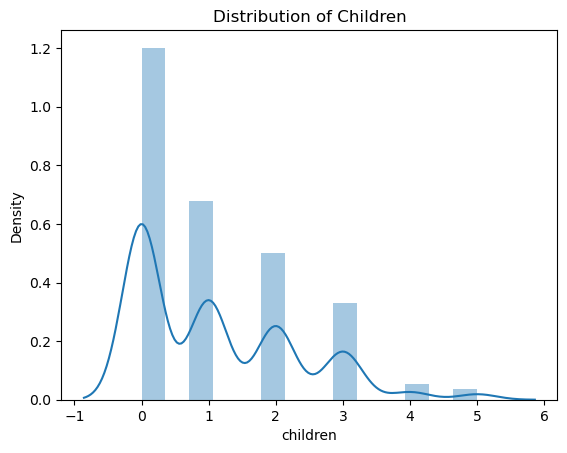

In [17]:
sns.distplot(df['children'], kde=True)
plt.title('Distribution of Children')
plt.show()

# Data Processing 

In [18]:
# Encoding Categorical Variables
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [19]:
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])
df['bmi'] = scaler.fit_transform(df[['bmi']])

In [20]:
# Splitting Features and Target
X = df.drop('charges', axis=1)
y = df['charges']

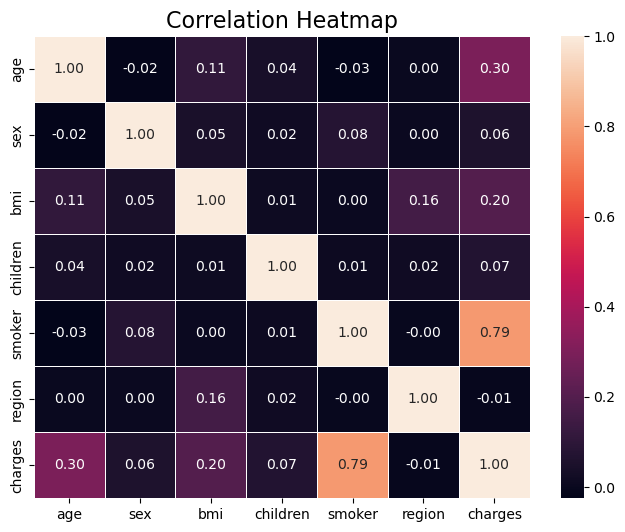

In [21]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Modeling

In [22]:
# Polynomial Regression with Cross-Validation
max_degree = 10
mean_errors = []

kf = KFold(n_splits=5)

for degree in range(1, max_degree + 1):
    fold_errors = []
    poly = PolynomialFeatures(degree=degree)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)

        fold_errors.append(mean_squared_error(y_test, y_pred))

    mean_errors.append(np.mean(fold_errors))

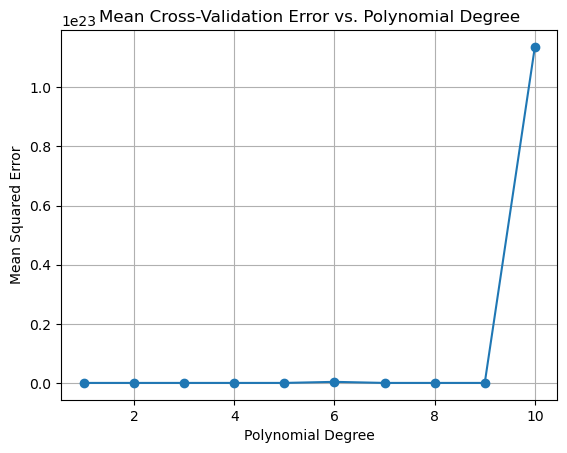

In [23]:
# Plotting Mean Cross-Validation Error
plt.plot(range(1, max_degree + 1), mean_errors, marker='o')
plt.title('Mean Cross-Validation Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.show()

In [24]:
# Polynomial Regression (Degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [25]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

In [26]:
# Model Training
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predictions
train_prediction = lr.predict(X_train)
test_prediction = lr.predict(X_test)

In [28]:
# Evaluation Metrics
print("Training Set Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_train, train_prediction)}")
print(f"R² Score: {r2_score(y_train, train_prediction)}")

print("Test Set Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, test_prediction)}")
print(f"R² Score: {r2_score(y_test, test_prediction)}")

Training Set Metrics:
Mean Squared Error: 23665891.191450264
R² Score: 0.8384232211576609
Test Set Metrics:
Mean Squared Error: 19976725.977543592
R² Score: 0.8637557014627595


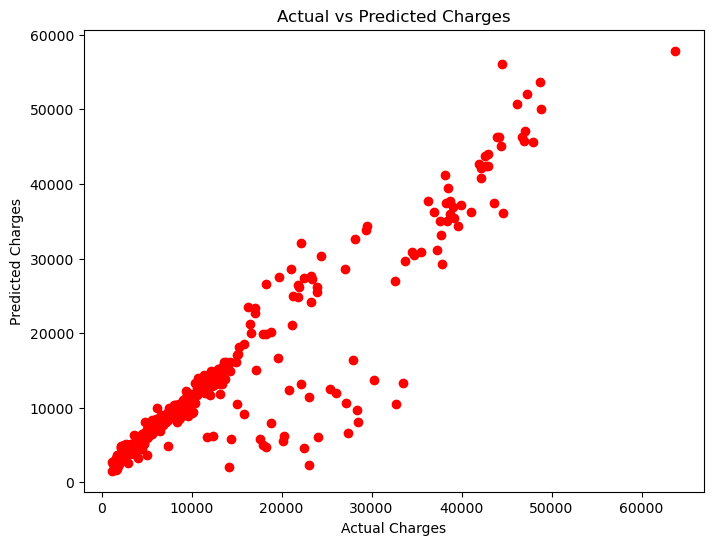

In [29]:
# Plotting Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_prediction, color='r')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()